In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
a = 2.8e-4
b = 5e-3
tau = .1
k = -.005

In [4]:
size = 100  # size of the 2D grid
dx = 2. / size  # space step
T = 9.0  # total time
dt = .001  # time step
n = int(T / dt)  # number of iterations

In [5]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)

In [6]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

In [7]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

[[-0.7094013  -0.7094013  -0.71414837 ...  0.80566929  0.79613823
   0.79613823]
 [-0.7094013  -0.7094013  -0.71414837 ...  0.80566929  0.79613823
   0.79613823]
 [-0.71674127 -0.71674127 -0.71138575 ...  0.71519441  0.6893923
   0.6893923 ]
 ...
 [-0.6046835  -0.6046835  -0.62510817 ... -0.79384449 -0.79870819
  -0.79870819]
 [-0.78326596 -0.78326596 -0.78896535 ... -0.78807639 -0.79279604
  -0.79279604]
 [-0.78326596 -0.78326596 -0.78896535 ... -0.78807639 -0.79279604
  -0.79279604]]
[[-0.3661625  -0.3661625  -0.35206898 ...  0.21442736  0.21699412
   0.21699412]
 [-0.3661625  -0.3661625  -0.35206898 ...  0.21442736  0.21699412
   0.21699412]
 [-0.35279882 -0.35279882 -0.33506274 ...  0.17419843  0.17321638
   0.17321638]
 ...
 [-0.13460771 -0.13460771 -0.13942474 ... -0.26145458 -0.29505134
  -0.29505134]
 [-0.18649952 -0.18649952 -0.19065142 ... -0.26687972 -0.30064986
  -0.30064986]
 [-0.18649952 -0.18649952 -0.19065142 ... -0.26687972 -0.30064986
  -0.30064986]]


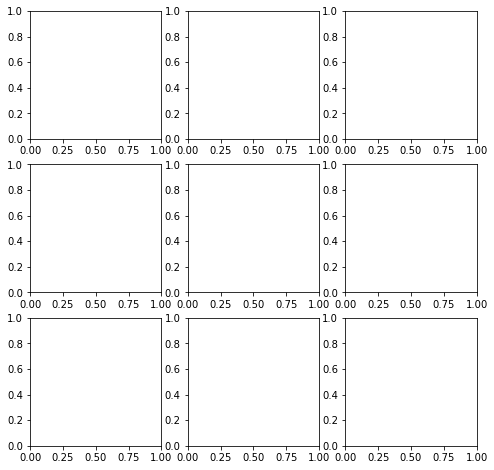

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    # We plot the state of the system at
    # 9 different times.
   # if i % step_plot == 0 and i < 9 * step_plot:
        #ax = axes.flat[i // step_plot]
        #show_patterns(U, ax=ax)
        #ax.set_title(f'$t={i * dt:.2f}$')
print(U)
print(V)

∂u∂tτ∂v∂t=aΔu+u−u3−v+k=bΔv+u−v

SyntaxError: invalid character '∂' (U+2202) (Temp/ipykernel_1940/2310617753.py, line 1)

In [ ]:
∂u∂tτ∂v∂t=aΔu+u−u3−v+k=bΔv+u−v